In [77]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [78]:
def option_chains(ticker):
    
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call" # add option type column for each call in the dataframe
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts]) # concatenate calls and puts dataframes
        chain['expiration'] = pd.to_datetime(expiration) # add expiration date column
        
        chains = pd.concat([chains, chain]) #add calls and puts to the chain DataFrame created before the loop
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days # add column days to expiration
    
    return chains

option_data = option_chains("TSLA")
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA251121C00100000,2025-11-19 19:48:23+00:00,100.0,301.17,316.35,320.65,0.0,0.0,61.0,1514.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
1,TSLA251121C00105000,2025-11-19 19:13:23+00:00,105.0,297.75,310.05,314.35,0.0,0.0,3.0,67.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
2,TSLA251121C00110000,2025-11-19 15:03:55+00:00,110.0,301.55,305.10,309.15,0.0,0.0,1.0,33.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
3,TSLA251121C00115000,2025-11-19 19:06:30+00:00,115.0,287.94,300.45,304.15,0.0,0.0,2.0,45.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
4,TSLA251121C00120000,2025-11-19 19:06:30+00:00,120.0,283.00,295.50,299.10,0.0,0.0,2.0,38.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,TSLA280121P00900000,2025-11-17 18:53:38+00:00,900.0,505.90,498.95,501.10,0.0,0.0,9.0,76.0,0.461172,True,REGULAR,USD,put,2028-01-21,791
95,TSLA280121P00910000,2025-11-18 19:32:57+00:00,910.0,521.11,507.85,509.80,0.0,0.0,3.0,54.0,0.458166,True,REGULAR,USD,put,2028-01-21,791
96,TSLA280121P00920000,2025-11-18 17:31:31+00:00,920.0,531.55,516.65,518.70,0.0,0.0,2.0,62.0,0.456037,True,REGULAR,USD,put,2028-01-21,791
97,TSLA280121P00930000,2025-11-18 17:27:34+00:00,930.0,540.25,526.05,528.10,0.0,0.0,2.0,99.0,0.456526,True,REGULAR,USD,put,2028-01-21,791


In [79]:
ticker = "AAPL"
options = option_chains(ticker)
asset = yf.Ticker(ticker)
expirations = asset.options
expirations


('2025-11-21',
 '2025-11-28',
 '2025-12-05',
 '2025-12-12',
 '2025-12-19',
 '2025-12-26',
 '2026-01-02',
 '2026-01-16',
 '2026-02-20',
 '2026-03-20',
 '2026-04-17',
 '2026-05-15',
 '2026-06-18',
 '2026-08-21',
 '2026-09-18',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-12-17',
 '2028-01-21')

"\nplt.figure(figsize=(12,6))\nplt.scatter(calls_at_expiry['strike'], calls_at_expiry['impliedVolatility'], color='blue', label='Calls', alpha=0.5)\nplt.scatter(puts_at_expiry['strike'], puts_at_expiry['impliedVolatility'], color='red', label   ='Puts', alpha=0.5)\nplt.title('Implied Volatility vs Strike Price for ' + ticker + ' Options at expiration date' + expirations[19])\nplt.xlabel('Strike Price')\nplt.ylabel('Implied Volatility')\nplt.legend()\nplt.grid(True)\nplt.show()\nplt.savefig('implied_volatility_vs_strike_price.png')\n"

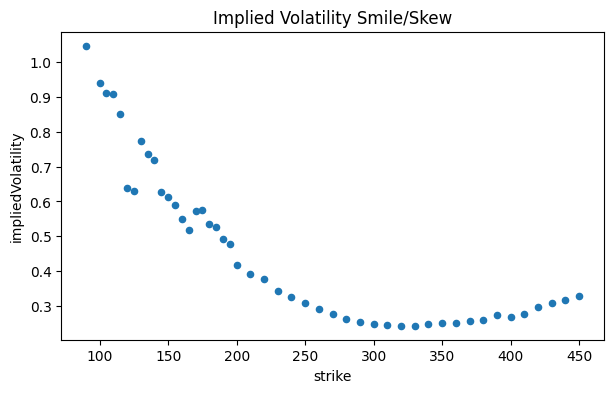

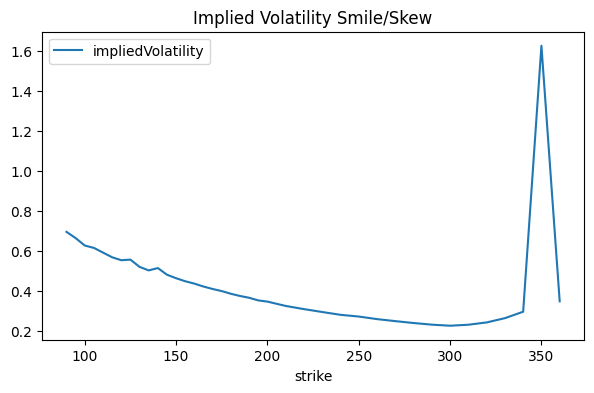

In [80]:

calls = options[options["optionType"] == "call"] # filter only calls through the column optionType we added before
puts = options[options["optionType"] == "put"] # filter only puts
calls_at_expiry = calls[calls["expiration"] == expirations[9]] # filter only options expiring on the first expiration date
puts_at_expiry = puts[puts["expiration"] == expirations[9]]
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.0001] # filter only options with implied volatility greater than 0.1%
filtered_puts_at_expiry = puts_at_expiry[puts_at_expiry.impliedVolatility >= 0.0001]

filtered_calls_at_expiry.plot.scatter("strike", "impliedVolatility", title="Implied Volatility Smile/Skew", figsize=(7, 4))
filtered_puts_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(title="Implied Volatility Smile/Skew", figsize=(7, 4))
'''
plt.figure(figsize=(12,6))
plt.scatter(calls_at_expiry['strike'], calls_at_expiry['impliedVolatility'], color='blue', label='Calls', alpha=0.5)
plt.scatter(puts_at_expiry['strike'], puts_at_expiry['impliedVolatility'], color='red', label   ='Puts', alpha=0.5)
plt.title('Implied Volatility vs Strike Price for ' + ticker + ' Options at expiration date' + expirations[19])
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('implied_volatility_vs_strike_price.png')
'''